목표 : 신용카드데이터로 군집분석을 진행하여 각 군집의 특징과 속성을 알아내어 마케팅 전략을 정한다.

CUST_ID : 신용카드 소지자의 식별자 (범주형 데이터, ID)

BALANCE : 사용자가 구매에 사용할 수 있도록 계좌에 남아 있는 잔액

BALANCE_FREQUENCY : 잔액이 업데이트되는 빈도 (0~1 점수, 1 = 자주 업데이트, 0 = 거의 업데이트 안 됨)

PURCHASES : 계좌에서 이루어진 전체 구매 금액, 소비 활동 수준을 보여줌.

ONEOFF_PURCHASES : 한 번에 이루어진 최대 구매 금액

INSTALLMENTS_PURCHASES : 할부로 결제된 구매 금액

CASH_ADVANCE : 사용자에게 제공된 현금 서비스 금액

PURCHASES_FREQUENCY : 구매가 얼마나 자주 이루어지는지를 나타내는 점수 (0~1, 1 = 자주 구매, 0 = 거의 안 함)

ONEOFFPURCHASESFREQUENCY : 한 번에 큰 금액의 구매가 얼마나 자주 발생하는지 (0~1)

PURCHASESINSTALLMENTSFREQUENCY : 할부 구매가 얼마나 자주 이루어지는지 (0~1)

CASHADVANCEFREQUENCY : 현금서비스(현금인출)가 얼마나 자주 발생하는지 (0~1)

CASHADVANCETRX : 현금서비스로 이루어진 거래 횟수

PURCHASES_TRX : 구매 거래 횟수

CREDIT_LIMIT : 사용자의 신용카드 한도

PAYMENTS : 사용자가 납부한 결제 금액, 채무 상환 성향을 보여줌.

MINIMUM_PAYMENTS : 사용자가 납부한 최소 결제 금액

PRCFULLPAYMENT : 전액 결제 비율 (사용자가 카드 대금을 100% 납부한 비율)

TENURE : 사용자의 신용카드 서비스 이용 기간



In [127]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Malgun Gothic')

In [128]:
%matplotlib Inline

In [214]:
card = pd.read_csv('CC GENERAL.csv',encoding='cp949')
card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [176]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [215]:
card['MINIMUM_PAYMENTS'] = card['MINIMUM_PAYMENTS'].fillna(card['MINIMUM_PAYMENTS'].median())
card=card.dropna(subset=['CREDIT_LIMIT'])

In [178]:
card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

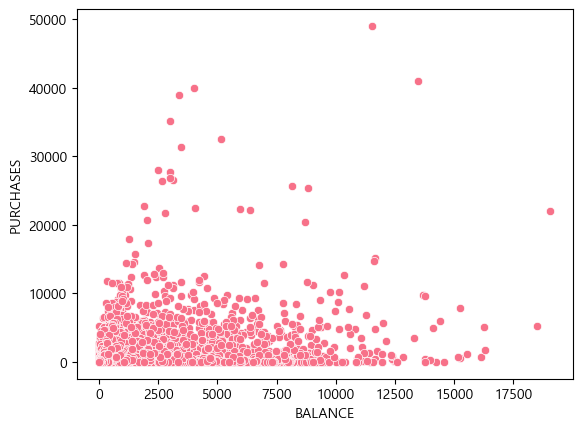

In [179]:
sns.scatterplot(x='BALANCE',y='PURCHASES',data=card)

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

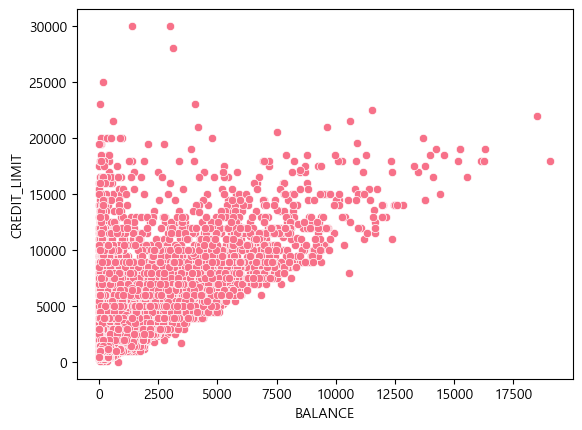

In [180]:
sns.scatterplot(x='BALANCE',y='CREDIT_LIMIT',data=card)

### 군집분석위해 준비작업

In [181]:
# 이상치는 군집분석에서 왜곡된 정보를 전달할수있어 체크
data_numeric=card.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=card[col].quantile(0.25)
    Q3=card[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")
    if outlier>0:
        data=card.loc[(card[col]<=upper_bound) & (card[col]>=lower_bound)]

Total Outliers in BALANCE are 695-7.77%
Total Outliers in BALANCE_FREQUENCY are 1492-16.67%
Total Outliers in PURCHASES are 808-9.03%
Total Outliers in ONEOFF_PURCHASES are 1013-11.32%
Total Outliers in INSTALLMENTS_PURCHASES are 867-9.69%
Total Outliers in CASH_ADVANCE are 1030-11.51%
Total Outliers in PURCHASES_FREQUENCY are 0-0.0%
Total Outliers in ONEOFF_PURCHASES_FREQUENCY are 782-8.74%
Total Outliers in PURCHASES_INSTALLMENTS_FREQUENCY are 0-0.0%
Total Outliers in CASH_ADVANCE_FREQUENCY are 525-5.87%
Total Outliers in CASH_ADVANCE_TRX are 804-8.98%
Total Outliers in PURCHASES_TRX are 766-8.56%
Total Outliers in CREDIT_LIMIT are 248-2.77%
Total Outliers in PAYMENTS are 808-9.03%
Total Outliers in MINIMUM_PAYMENTS are 909-10.16%
Total Outliers in PRC_FULL_PAYMENT are 1474-16.47%
Total Outliers in TENURE are 1365-15.25%


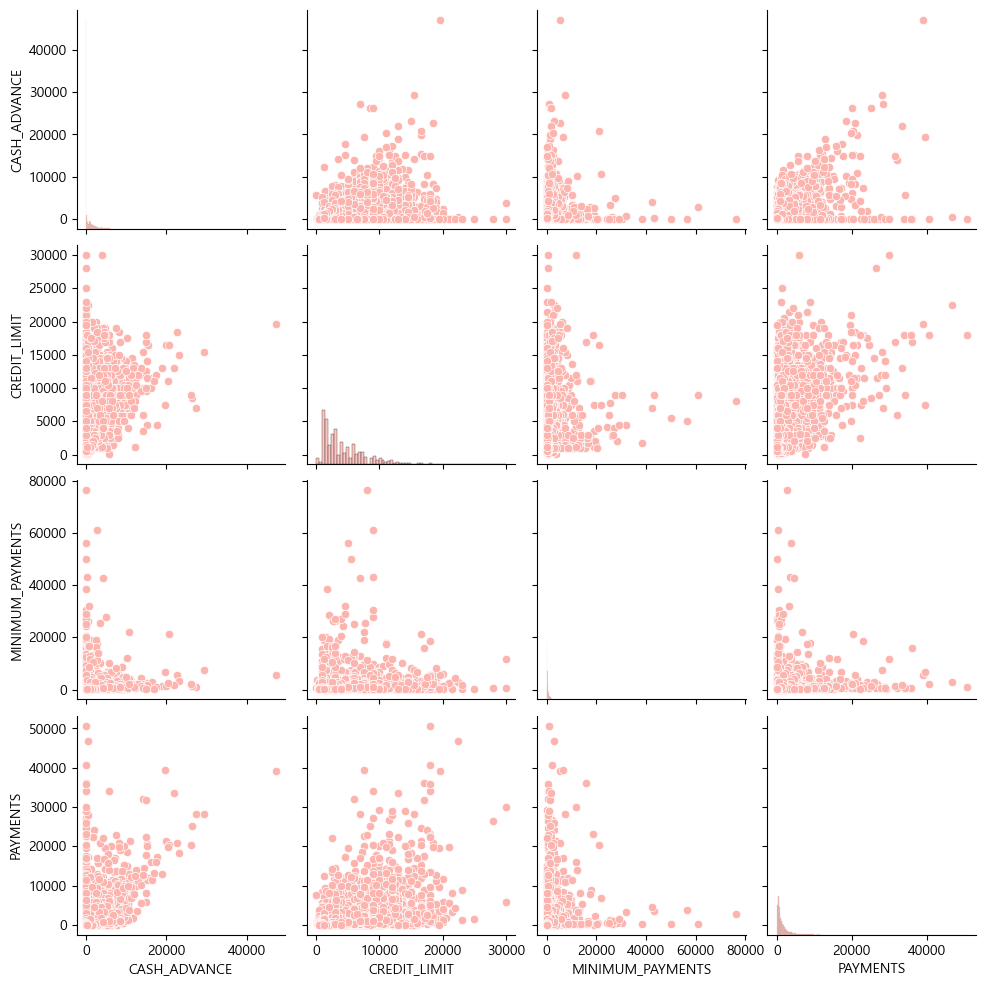

In [182]:
# 현금인출서비스, 신용카드 한도 와 최소결제금액, 결제금액간의 관계 상관관계?
# 예를들어 신용카드 한도가 높은 사람은 최소결제금액이 크고 결제금액이 클까?
# 이런 상관관계를 통해 특정변수에 치우쳐져있는지 확인하여 데이터를 그대로 쓸지 아니면 로그변환 등 변환을 시킬 지 선택 
sns.set_palette("Pastel1")
card.columns = card.columns.str.strip()
sns.pairplot(card, vars=['CASH_ADVANCE', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS', 'PAYMENTS'])
plt.show()

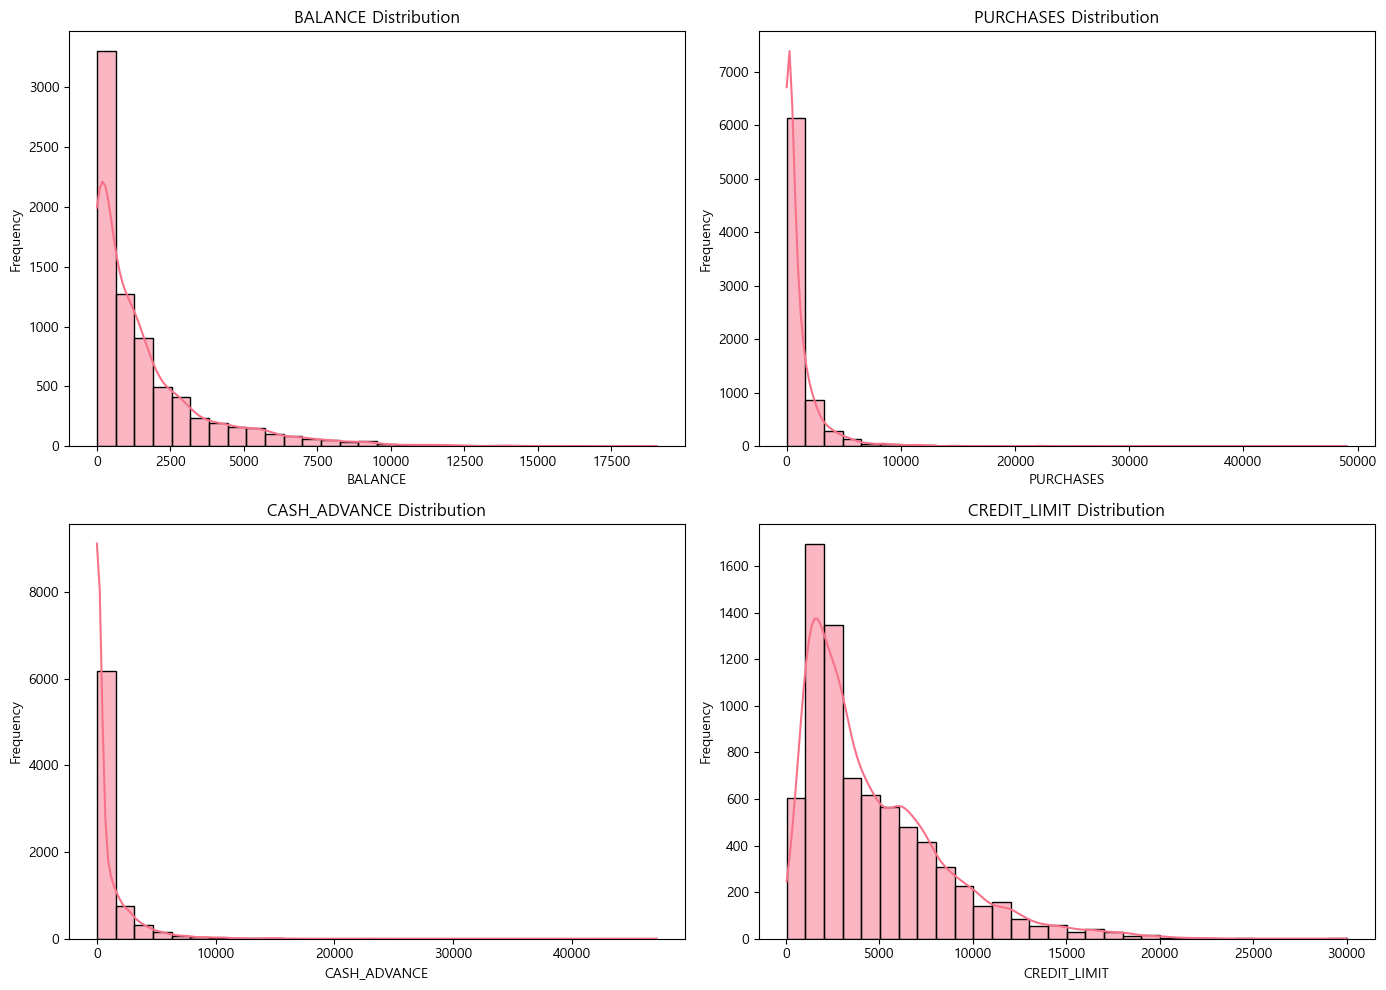

In [183]:
# 숫자형 컬럼들의 빈도수를 체크 
# 숫자형들의 단위와 빈도수의 단위가 맞지 않으면 군집분석 시 왜곡될수있어 데이터의 변환을 거쳐야하기 때문에 확인 
numeric_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
plt.figure(figsize=(14, 10))
sns.set_palette("husl")
for i, col in enumerate(numeric_cols, 1): #enumerate(,1)은 인덱스가 0번시작이 아닌 1시작으로 설정
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

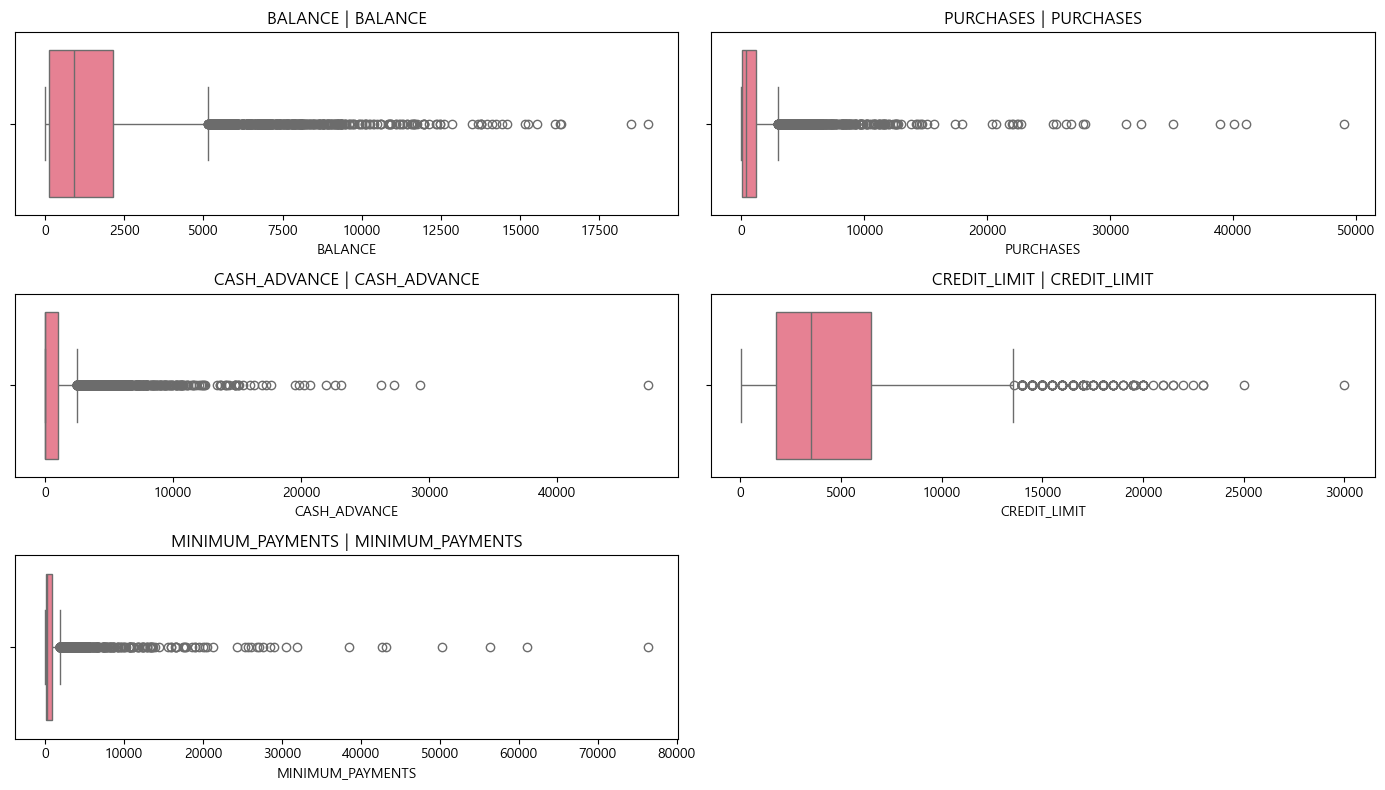

In [184]:
numeric_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(x=data[col])
    plt.title(f'{col} | {col}')
plt.tight_layout()
plt.show()

### 데이터 변환

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [185]:
la = LabelEncoder()
card['CUST_ID'] = la.fit_transform(card['CUST_ID'])
card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


k-means

In [216]:
# 표준화
# 표준화할시 cust_id를 제외하지 않으면 거리기반 군집분석 시 노이즈로 왜곡된 정보 전달할 수 있어 제외해야한다.
sc = StandardScaler()
scaled_data = sc.fit_transform(card.drop(columns=['CUST_ID']))

In [212]:
scaled_data[1]

array([ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
        2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
        0.11007385, -0.59179588,  0.68860056,  0.81864213,  0.08773463,
        0.2342269 ,  0.36067954])

### k-means 진행 

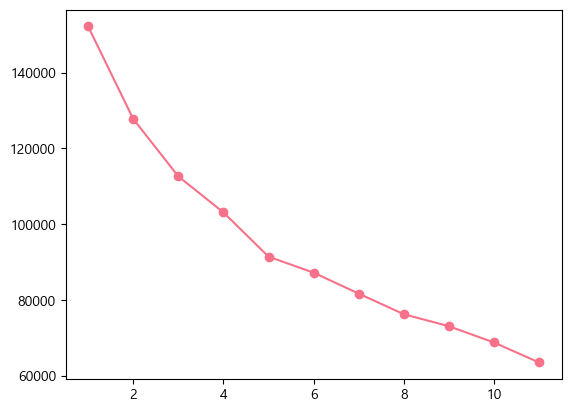

In [217]:
# 엘보우 메서드 그려서 최적의 k찾기
num_cluster = []
error=[]
for i in range(1,12):
    model = KMeans(n_clusters = i)
    model.fit(scaled_data)
    num_cluster.append(i)
    error.append(model.inertia_)
plt.plot(num_cluster, error, marker='o')
plt.show()

In [234]:
# k를 설정하고 kmeans 군집분석 진행 
# k를 5로 한 이유 - 4로 했을시에 vip와같은 고객층을 분리할수없어서 vip와같은 특별클래스에 대한 구별을 하고싶어서 k=5로 설정
model = KMeans(n_clusters=5, random_state=42)

In [235]:
model.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [236]:
card["K_Means"] = model.labels_
card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_Means,PCA1,PCA2
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,4,-1.683768,-1.072569
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,-1.134846,2.508739
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,1,0.969060,-0.383487
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,4,-0.888426,0.004385
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,4,-1.600262,-0.684048


In [231]:
from sklearn.decomposition import PCA

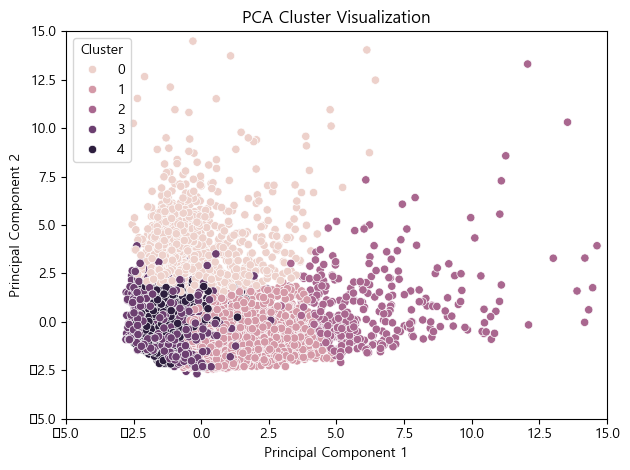

In [237]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
card["PCA1"] = pca_result[:, 0]
card["PCA2"] = pca_result[:, 1]

sns.scatterplot(x="PCA1", y="PCA2", hue="K_Means", data=card)
plt.title("PCA Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.tight_layout()
plt.show()

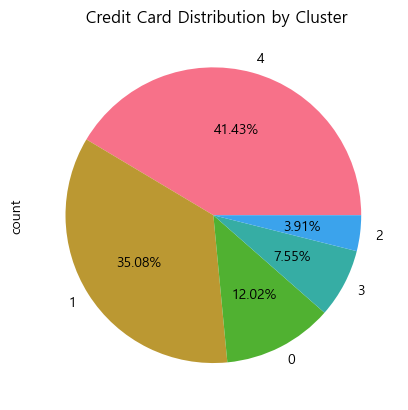

In [238]:
# k = 5 로 설정한이유 : 4로 하면 모든 그룹이 다 비슷한 소비형태를 띄여 vip와 같은 특급클래스의 특징들을 살펴보고자 5로 설정하였다.
sns.set_palette("husl")
card["K_Means"].value_counts().plot.pie(autopct="%0.2f%%")
plt.title(" Credit Card Distribution by Cluster")
plt.show()

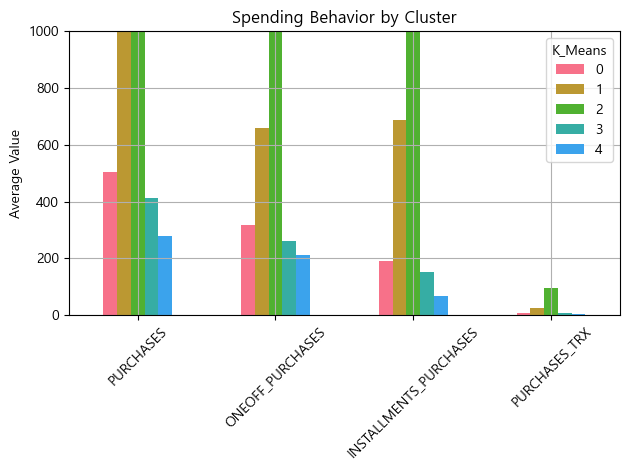

In [239]:
# 군집별로 소비특징 파악
# 군집2번은 가장 인원이 가장 적지만 가장 많은 소비를 하는 걸 고액결제를 많이 한다는 걸 알수있다.
spending_features = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX']
card.groupby('K_Means')[spending_features].mean().T.plot(kind='bar')
plt.title("Spending Behavior by Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(0,1000)  
plt.show()

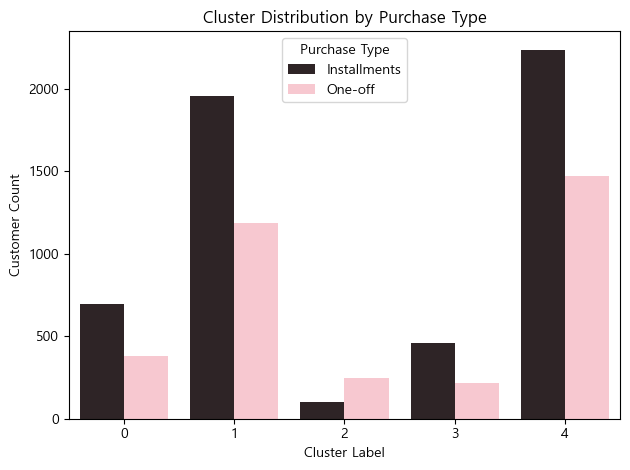

In [240]:
# 할부,일시불 고객의 분포도 확인
# 대부분의 군집은 할부의 고객이 더 많이 존재하지만 고액결제 군집인 군집 2는 일시불 고객이 더 많은 걸 볼 수 있다.
import numpy as np
card["PURCHASE_TYPE"] = np.where(card["ONEOFF_PURCHASES"] > card["INSTALLMENTS_PURCHASES"], "One-off", "Installments")
sns.countplot(x="K_Means", hue="PURCHASE_TYPE", data=card,color="pink")
plt.title("Cluster Distribution by Purchase Type")
plt.xlabel("Cluster Label")
plt.ylabel("Customer Count")
plt.legend(title="Purchase Type")
plt.tight_layout()
plt.show()

### 군집 속성 알아내기 

In [241]:

candidates = [
    'BALANCE','CREDIT_LIMIT','PURCHASES','PAYMENTS','MINIMUM_PAYMENTS','CASH_ADVANCE'
]
cols = [c for c in candidates if c in card.columns]

# ② 군집별 요약통계
cluster_summary = (
    card.groupby('K_Means')[cols]
        .agg(['mean','median','std'])
        .round(2)
)
cluster_counts = card['K_Means'].value_counts().sort_index()
cluster_share = (cluster_counts/len(card)).round(3)

print("군집별 인원 및 비중")
print(pd.DataFrame({'count':cluster_counts, 'share':cluster_share}))
print("\n군집별 요약통계 (평균/중앙/표준편차)")
display(cluster_summary)

군집별 인원 및 비중
         count  share
K_Means              
0         1076  0.120
1         3139  0.351
2          350  0.039
3          676  0.076
4         3708  0.414

군집별 요약통계 (평균/중앙/표준편차)


BALANCE                   CREDIT_LIMIT                  PURCHASES  \
            mean   median      std         mean  median      std      mean   
K_Means                                                                      
0        4819.32  4530.42  2765.82      7834.11  7500.0  3722.33    505.76   
1         953.57   374.28  1272.45      4443.02  3500.0  3338.60   1346.87   
2        3775.13  2719.93  3457.42      9968.29  9000.0  4803.62   8285.26   
3         812.92   440.65  1059.76      2488.98  1500.0  2289.01    411.43   
4        1065.91   819.76  1155.87      3417.80  2500.0  2723.94    277.43   

                          PAYMENTS                   MINIMUM_PAYMENTS  \
          median      std     mean   median      std             mean   
K_Means                                                                 
0          99.50   864.61  3692.15  2055.93  4355.94          2120.87   
1         993.96  1113.19  1450.15  1049.38  1356.10           673.75   
2        6352.12  6254.77  7903.22  5778.45  7206.94          2134.66   
3         172.30   670.78   614.45   288.65   971.45           337.18   
4          88.94   469.35  1026.26   571.76  1614.78           590.59   

                          CASH_ADVANCE                    
          median      std         mean   median      std  
K_Means                                                   
0        1399.00  4067.58      4683.70  3800.72  3737.76  
1         202.85  1840.11       210.71     0.00   616.48  
2         776.28  5427.26       712.45     0.00  1995.81  
3         181.53   572.38      1029.70   358.85  1438.35  
4         312.34  1368.91       570.17    93.52   913.43

In [242]:
# lift_pct가 +이면 그 군집이 해당 지표가 평균보다 높다(강점), -이면 낮다(약점).
# zscore는 크기가 클수록 차이가 뚜렷.

overall_mean = card[cols].mean()
overall_std  = card[cols].std()

cluster_mean = card.groupby('K_Means')[cols].mean()

# ① 리프트(%) : 군집평균이 전체평균보다 몇 % 높은지/낮은지
lift_pct = ((cluster_mean / overall_mean) - 1.0).replace([np.inf,-np.inf], np.nan).round(2)

# ② z-스코어 : 군집평균이 전체평균에서 표준편차 몇 개만큼 떨어져 있는지
zscore = ((cluster_mean - overall_mean) / overall_std).replace([np.inf,-np.inf], np.nan).round(2)

print("군집별 리프트(전체 평균 대비 %)")
display(lift_pct)

print("군집별 z-스코어(표준편차 기준)")
display(zscore)

군집별 리프트(전체 평균 대비 %)


,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE
K_Means,,,,,,
0,2.08,0.74,-0.50,1.13,1.51,3.78
1,-0.39,-0.01,0.34,-0.16,-0.20,-0.78
2,1.41,1.22,7.26,3.56,1.53,-0.27
3,-0.48,-0.45,-0.59,-0.65,-0.60,0.05
4,-0.32,-0.24,-0.72,-0.41,-0.30,-0.42


군집별 z-스코어(표준편차 기준)


,BALANCE,CREDIT_LIMIT,PURCHASES,PAYMENTS,MINIMUM_PAYMENTS,CASH_ADVANCE
K_Means,,,,,,
0,1.56,0.92,-0.23,0.68,0.55,1.77
1,-0.29,-0.01,0.16,-0.10,-0.07,-0.37
2,1.06,1.50,3.41,2.13,0.55,-0.13
3,-0.36,-0.55,-0.28,-0.39,-0.22,0.02
4,-0.24,-0.30,-0.34,-0.24,-0.11,-0.19


| 군집                | 특징 요약                                                                                                                                                   | 마케팅 전략                                                                                                                                                 |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **0 (현금서비스 의존형)** | - BALANCE, CREDIT\_LIMIT, PAYMENTS, MIN\_PAY, CASH\_ADVANCE 모두 **평균 이상**<br>- PURCHASE는 **평균 이하** → 소비보다는 **단기 자금 조달** 목적<br>- 결제는 성실히 하지만 **금리 부담 위험** | - **리스크 관리**: 저금리 대환, 분할 상환 옵션<br>- **소비 전환 유도**: 현금서비스 대신 카드 결제 시 포인트 추가 적립                                                                           |
| **1 (저활동 대중층)**   | - **대부분 평균 이하**<br>- PURCHASE만 약간 높음<br>- **고객 규모가 가장 큼 (35%+)**                                                                                        | - **생활밀착형 혜택**: 카페·편의점 3% 환급, 교통비 할인<br>- **소비 습관 형성**: 만보기 연동 포인트, 소소한 리워드 제공                                                                         |
| **2 (VIP 고소비층)**  | - PURCHASE, PAYMENTS, BALANCE, CREDIT\_LIMIT 모두 **압도적으로 높음**<br>- CASH\_ADVANCE는 **낮음** → 리스크 적음<br>- 카드사 핵심 수익원                                        | - **프리미엄 카드 제공**: 플래티넘·블랙카드, 높은 한도<br>- **여행/항공 특화**: 마일리지, 호텔, 공항 라운지<br>- **고급 라이프스타일 혜택**: 골프, 와인, 공연·콘서트 VIP석<br>- **전담 관리 서비스**: 개인 매니저, 맞춤형 금융상품 |
| **3 (저소비·저한도층)**  | - BALANCE, CREDIT\_LIMIT, PURCHASES, PAYMENTS 모두 **평균 이하**<br>- CASH\_ADVANCE 거의 없음<br>- **사용 소극적**                                                     | - **소액 결제 촉진**: 편의점, 커피 소액 캐시백<br>- **가입 유지 장려**: 연회비 면제, 기본 혜택 제공<br>- 리스크 관리 위주 유지                                                                   |
| **4 (저소득·저활동층)**  | - 모든 지표 **평균 이하**<br>- PURCHASE, PAYMENTS, BALANCE 모두 낮음<br>- **비활성 그룹**                                                                                | - **사용 활성화 캠페인**: 첫 사용 시 포인트 지급<br>- **생활 필수 혜택 제공**: 대중교통, 온라인 쇼핑 소액 쿠폰<br>- **휴면 방지용 관리 전략**                                                         |
